## Lending Club Case Study
#### Executive PG Programme in Machine Learning & AI - January 2023
#### Name: Bharat Hegde

The problem is related to a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

The problem statement is to come up with the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.  The driving factors should be such that they can be utilised during the process loan grant decision itself.


#### Overall Approach

The company has shared a data file which contains the performance data of the loans in past many years. As part of this case study:

•Understand the structure of the data 
•Clean the data
•Analyse and Visualise the data
•Conclusion: Suggest driving factors behind the loan default to the company


### Load necessary the libraries


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load data


In [39]:
df = pd.read_csv("loan.csv")

/var/folders/fb/xpgtrc393vqg2njlhfzt2b9w0000gq/T/ipykernel_83042/2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [40]:
len(df)

39717

In [41]:
df.shape

(39717, 111)

#### Found that there are 39717 loan rows

In [42]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Found that there are totally 32950 fully paid loans, 5627 are defaulters, and 1140 are currently paying

### Cleaning the data


In [43]:

#Dropping the cloumns which seemed to have values as 0 or NA, or the same values, these columns will not be useful for analysis
df.drop(['application_type','annual_inc_joint','dti_joint', 'verification_status_joint', 'acc_now_delinq',
         'tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
         'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
         'inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
         'bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
         'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
         'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
         'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
         'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
         'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75',
         'tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',
         'total_il_high_credit_limit','policy_code','mths_since_last_major_derog','collections_12_mths_ex_med','next_pymnt_d','id','member_id','mths_since_last_record'], axis=1, inplace=True)


In [44]:
df.shape

(39717, 46)

In [45]:
#Remove the % in the interest rate and revol_util columns
df['int_rate'] = df['int_rate'].str[:-1].astype('float64')
df['revol_util'] = df['revol_util'].str[:-1].astype('float64')

#Replace NA values with 0
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

#cleanup emp_length and convert datatype
df['emp_length'] = df['emp_length'].str.replace("years", '')
df['emp_length'] = df['emp_length'].str.replace("year", '')
df['emp_length'] = df['emp_length'].str.replace("< ", '')
df['emp_length'] = df['emp_length'].str.replace("+", '')
df['emp_length'].fillna(0)
df['emp_length'] = df['emp_length'].astype('float64')

df['term'] = df['term'].str.replace(" months", '')
df['term'] = df['term'].astype('int32')



/var/folders/fb/xpgtrc393vqg2njlhfzt2b9w0000gq/T/ipykernel_83042/407854435.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length'] = df['emp_length'].str.replace("+", '')


In [46]:
#Introducing few new columns as category codes for few columns with string values, so that corellation matrix can be created
df['verification_status_code']=df['verification_status'].astype('category').cat.codes
df['purpose_code']=df['purpose'].astype('category').cat.codes
df['sub_grade_code']=df['sub_grade'].astype('category').cat.codes
df['home_ownership_code']=df['home_ownership'].astype('category').cat.codes
loan_code=df['loan_status'].astype('category').cat.codes
df.insert (0, "loan_status_code", loan_code)
df['grade']=df['grade'].astype('string')
grade_code=df['grade'].astype('category').cat.codes
df.insert (1, "grade_code", grade_code)
df['addr_state_code']=df['addr_state'].astype('category').cat.codes


### Ready for analysis now. Creating a correlation matrix
#### Interested correlation with the loan status

In [47]:
df.corr()


,loan_status_code,grade_code,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,verification_status_code,purpose_code,sub_grade_code,home_ownership_code,addr_state_code
loan_status_code,1.000000,-0.211936,-0.079476,-0.076350,-0.060091,-0.211644,-0.226822,-0.036132,-0.025122,0.037053,-0.049951,-0.019234,-0.067612,-0.018093,0.004678,-0.048212,-0.011391,-0.101711,0.018919,-0.133108,-0.132967,0.192413,0.187913,0.302839,-0.065559,-0.160246,-0.330683,-0.199591,0.233293,-0.045384,-0.061355,-0.040771,-0.215516,-0.015715,0.021788
grade_code,-0.211936,1.000000,0.290447,0.291034,0.268682,0.430900,0.948627,0.267104,0.003631,0.054913,0.096056,0.163544,0.116017,0.158659,0.013449,0.092311,0.092717,0.445535,-0.037526,0.099001,0.099073,0.288917,0.270988,0.169222,0.511265,0.101354,0.119902,0.069856,0.141277,0.078448,0.192740,-0.006435,0.979566,0.054169,-0.002890
loan_amnt,-0.079476,0.290447,1.000000,0.981578,0.940034,0.361036,0.309415,0.930288,0.154473,0.271149,0.066439,-0.031864,0.009229,-0.046223,0.177168,-0.051236,0.317597,0.066149,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180,0.416186,-0.125192,0.302329,-0.175968,0.000309
funded_amnt,-0.076350,0.291034,0.981578,1.000000,0.958422,0.340510,0.312619,0.956159,0.154030,0.266965,0.066283,-0.032355,0.009259,-0.044829,0.175530,-0.052169,0.310392,0.069962,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502,0.409789,-0.128800,0.301621,-0.170489,0.001578
funded_amnt_inv,-0.060091,0.268682,0.940034,0.958422,1.000000,0.360747,0.306657,0.905039,0.164863,0.254375,0.074689,-0.038501,-0.005712,-0.045886,0.163027,-0.053214,0.290797,0.074939,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746,0.423062,-0.135696,0.279219,-0.167500,0.000743
term,-0.211644,0.430900,0.361036,0.340510,0.360747,1.000000,0.451699,0.101973,0.113383,0.046675,0.082426,0.006350,0.041206,0.004711,0.050769,0.007233,0.072367,0.069834,0.096305,0.226003,0.225764,0.333761,0.349767,0.221642,0.529876,0.010908,0.101351,0.031731,0.232915,0.011987,0.257458,-0.034869,0.441739,-0.106522,0.009324
int_rate,-0.226822,0.948627,0.309415,0.312619,0.306657,0.451699,1.000000,0.282703,0.005765,0.053185,0.111162,0.157916,0.133013,0.164284,0.010395,0.097208,0.097100,0.467168,-0.043570,0.134616,0.134668,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.082550,0.210899,-0.013641,0.961573,0.064337,-0.001183
installment,-0.036132,0.267104,0.930288,0.956159,0.905039,0.101973,0.282703,1.000000,0.124807,0.270874,0.054186,-0.019657,0.009722,-0.029870,0.172812,-0.046532,0.312679,0.095484,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103,0.361562,-0.129721,0.276086,-0.138246,-0.002405
emp_length,-0.025122,0.003631,0.154473,0.154030,0.164863,0.113383,0.005765,0.124807,1.000000,0.111838,0.051119,0.015270,0.008623,0.039335,0.097383,0.062175,0.153662,0.011874,0.207419,0.053050,0.053034,0.139288,0.149362,0.129264,0.126042,-0.016043,0.024795,0.006258,0.077382,0.061086,0.093725,-0.041102,0.000931,-0.255701,0.005771
annual_inc,0.037053,0.054913,0.271149,0.266965,0.254375,0.046675,0.053185,0.270874,0.111838,1.000000,-0.122732,0.023083,0.033908,0.018026,0.158200,-0.018689,0.279961,0.017926,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801,0.125413,-0.000445,0.056452,-0.197778,-0.008055


#### Found that loan_status is significantly correlated to following features which can be determined or known before the disbursal of the loan

    grade_code (0.211936)
    term(0.211644), 
    int_rate(0.226822), 
    inq_last_6mths(0.067612)
    
 
#### Found that during the tenure if the revol_util increaes, that seems to have some correlation
    revol_util (-0.10)

#### Had suspected that emp_length,  dti, delinq_2yrs could be singificant factors as well, but they turned out to be insignficantly related to the eventual loan status

### Also will be analysing the 'purpose' further



### Visualising the impact of loan Grade vs Loan Status 


In [48]:
pivot = pd.pivot_table(df,index=['grade'],columns=['loan_status'],
                       values=['loan_status_code'],
                       aggfunc='count', margins=True, margins_name='Total')

pivot = (
   pivot.pipe(lambda d: d.div(d[('loan_status_code',       'Total')], axis='index'))*100.0
)

pivot = pivot.drop(index='Total', axis=0)
pivot = pivot.drop(('loan_status_code',       'Total'), axis=1)
pivot

loan_status_code                     
loan_status      Charged Off   Current Fully Paid
grade                                            
A                   5.969261  0.396629  93.634110
B                  11.855241  2.870216  85.274542
C                  16.633737  3.260064  80.106199
D                  21.066516  4.183154  74.750330
E                  25.158339  6.298381  68.543279
F                  30.409914  6.959009  62.631077
G                  31.962025  5.379747  62.658228

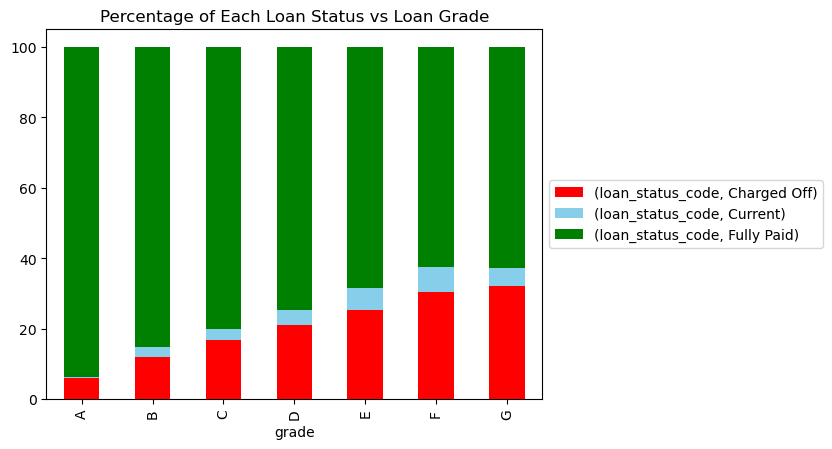

In [49]:
#create stacked bar chart

pivot.plot( kind='bar', stacked=True, title='Percentage of Each Loan Status vs Loan Grade', color=['red', 'skyblue', 'green'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



##  Conclusion 1
### Grade A (6% defaulters) and B ( 11% defaulters) relatively safer. Other grades: C ( 16.6% defaulters ), D( 21.0% defaulters),  E( 25.1% defaulters),  F( 30% defaulters),  G( 31.96% defaulters) are risky, since default % is comparitively higher.


### Visualising the impact of Loan term vs Loan Status 


In [50]:
pivot = pd.pivot_table(df,index=['term'],columns=['loan_status'],
                       values=['loan_status_code'],
                       aggfunc='count', margins=True, margins_name='Total', fill_value=0)

pivot = (
   pivot.pipe(lambda d: d.div(d[('loan_status_code',       'Total')], axis='index'))*100.0
)

pivot = pivot.drop(index='Total', axis=0)
pivot = pivot.drop(('loan_status_code',       'Total'), axis=1)
pivot.fillna(0)
pivot

loan_status_code                      
loan_status      Charged Off    Current Fully Paid
term                                              
36                 11.090872   0.000000  88.909128
60                 22.596742  10.733453  66.669805

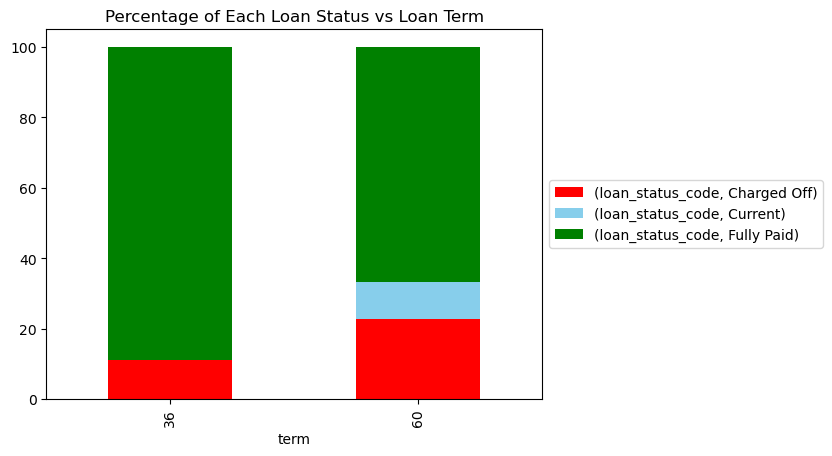

In [51]:
pivot.plot( kind='bar', stacked=True, title='Percentage of Each Loan Status vs Loan Term', color=['red', 'skyblue', 'green'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Conclusion 2 : Term = 36 months is much safer (11% defaulters) compared to term = 60 months ( 22.6% defaulters) 

### Visualising the impact of loan term vs interest rate


<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

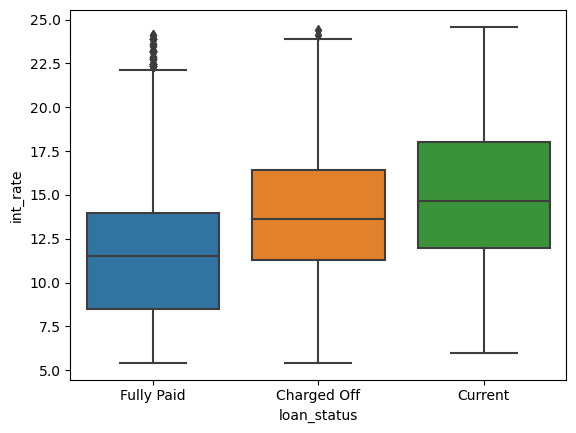

In [52]:
### Visualising the impact of loan status vs interest rate



sns.boxplot(data=df, x="loan_status", y="int_rate")


## Conclusion 3 : As interest rate increases, probability of borrowers repaying decreases. For pully paid the mean int_rate ~= 12% and for defaulters mean int_rate is roughly 13.8%( Ignoring the currently paying members, since their population is lower, and we don't know if they were defaulters later )

#### 25 percentile, 50 percentile value, and 75 perecentile value for Default cases is more than that of Fully Paid.


#### Visualising the impact of number of inquiries in last 6 months vs loan status

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

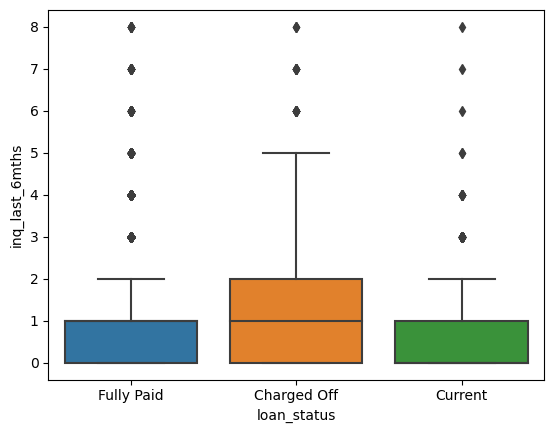

In [53]:
sns.boxplot(data=df, x="loan_status", y="inq_last_6mths")


## Conclusion 4 : As number of inquiries in last 6 months increases, the chances of default also decreases. As per the above data, if number of inquiries is more than 1, then chances of repaying decreases.
####  50 percentile value, and 75 perecentile value for Default cases is more than that of Fully Paid.


### Analysing the impact of Purpose mentioned vs default

In [54]:

pivot = pd.pivot_table(df,index=['purpose'],columns=['loan_status'],
                       values=['loan_status_code'],
                       aggfunc='count', margins=True, margins_name='Total', fill_value=0)

pivot = (
   pivot.pipe(lambda d: d.div(d[('loan_status_code',       'Total')], axis='index'))*100.0
)

pivot = pivot.drop(index='Total', axis=0)
pivot = pivot.drop(('loan_status_code',       'Total'), axis=1)
pivot

loan_status_code                     
loan_status             Charged Off   Current Fully Paid
purpose                                                 
car                       10.329245  3.227889  86.442866
credit_card               10.565302  2.007797  87.426901
debt_consolidation        14.843624  3.143608  82.012768
educational               17.230769  0.000000  82.769231
home_improvement          11.659946  3.393817  84.946237
house                     15.485564  3.674541  80.839895
major_purchase            10.150892  1.691815  88.157293
medical                   15.295815  1.731602  82.972583
moving                    15.780446  1.200686  83.018868
other                     15.852742  3.205610  80.941648
renewable_energy          18.446602  0.970874  80.582524
small_business            25.984683  4.048140  69.967177
vacation                  13.910761  1.574803  84.514436
wedding                   10.137276  2.217529  87.645195

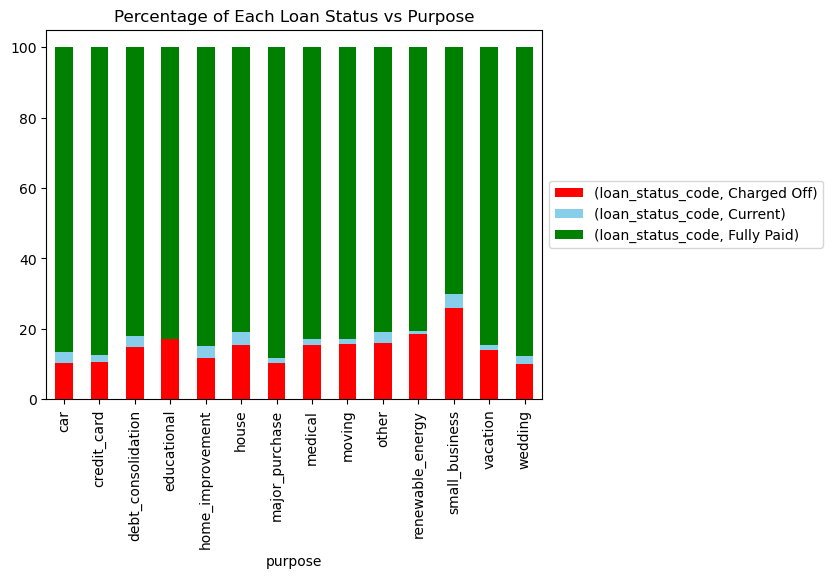

In [55]:
pivot.plot( kind='bar', stacked=True, title='Percentage of Each Loan Status vs Purpose', color=['red', 'skyblue', 'green'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Conclusion 5 : If somebody mentions purpose of loan as Small Business, then there is 26% chance of defaulting. Other high risk categories are: Educational, House, Medical, Renewable Energy ( with probability ~= 15% )



### Analysing the impact of Revolving line utilization rate while the loan is in force

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

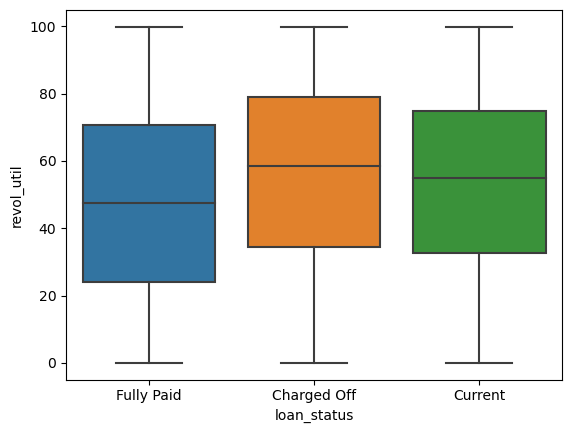

In [56]:
sns.boxplot(data=df, x="loan_status", y="revol_util")


## Conclusion 6 : (While the loan is in force) As Revolving Utilisation of the bank balance increases, the chances of default also increases. 
### As per the above data, if revol_util is more than 50%, then chances of repaying decreases.
#### 25 percentile, 50 percentile value, and 75 percentile value for Default cases is more than that of Fully Paid.
